Part 1: Using Ordinal encoding for the ordinal data.

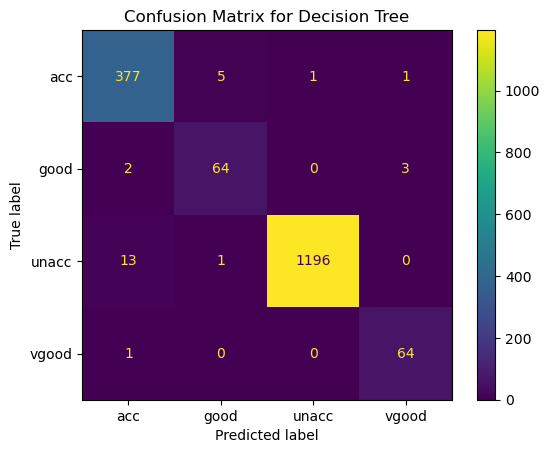

Decision Tree Performance Metrics:
Accuracy: 0.9844
Classification Report:
              precision    recall  f1-score   support

         acc       0.96      0.98      0.97       384
        good       0.91      0.93      0.92        69
       unacc       1.00      0.99      0.99      1210
       vgood       0.94      0.98      0.96        65

    accuracy                           0.98      1728
   macro avg       0.95      0.97      0.96      1728
weighted avg       0.98      0.98      0.98      1728



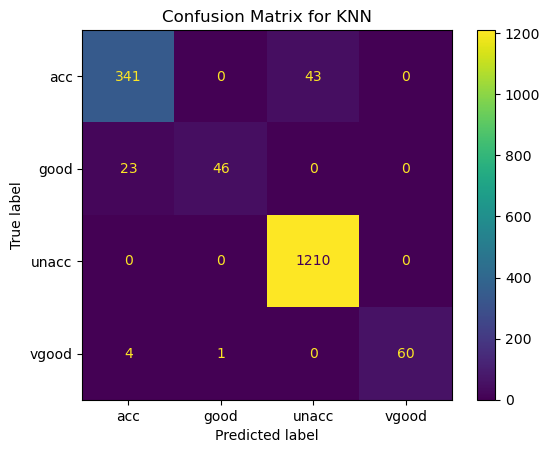

KNN Performance Metrics:
Accuracy: 0.9589
Classification Report:
              precision    recall  f1-score   support

         acc       0.93      0.89      0.91       384
        good       0.98      0.67      0.79        69
       unacc       0.97      1.00      0.98      1210
       vgood       1.00      0.92      0.96        65

    accuracy                           0.96      1728
   macro avg       0.97      0.87      0.91      1728
weighted avg       0.96      0.96      0.96      1728



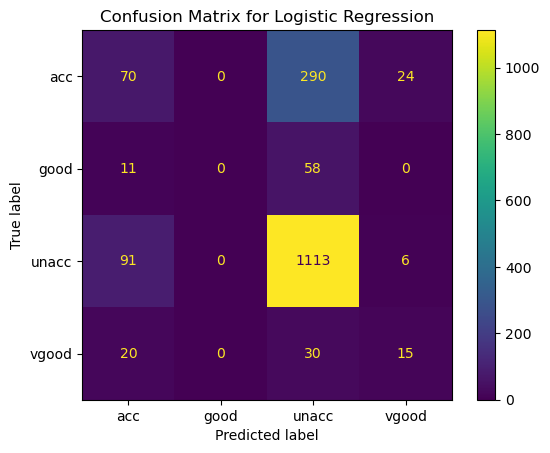

Logistic Regression Performance Metrics:
Accuracy: 0.6933
Classification Report:
              precision    recall  f1-score   support

         acc       0.36      0.18      0.24       384
        good       0.00      0.00      0.00        69
       unacc       0.75      0.92      0.82      1210
       vgood       0.33      0.23      0.27        65

    accuracy                           0.69      1728
   macro avg       0.36      0.33      0.33      1728
weighted avg       0.62      0.69      0.64      1728



C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


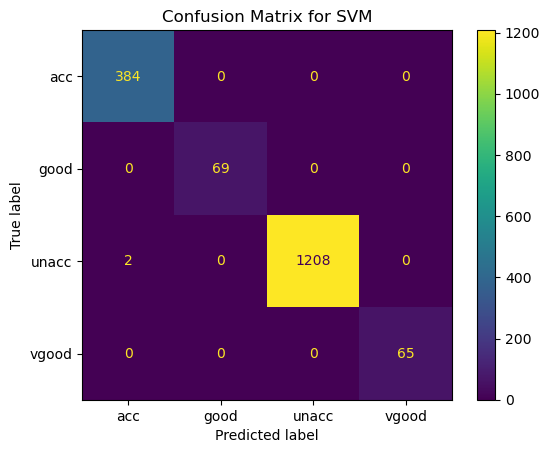

SVM Performance Metrics:
Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

         acc       0.99      1.00      1.00       384
        good       1.00      1.00      1.00        69
       unacc       1.00      1.00      1.00      1210
       vgood       1.00      1.00      1.00        65

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728



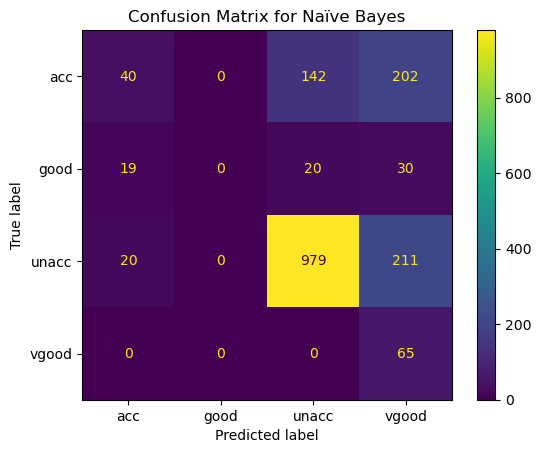

Naïve Bayes Performance Metrics:
Accuracy: 0.6273
Classification Report:
              precision    recall  f1-score   support

         acc       0.51      0.10      0.17       384
        good       0.00      0.00      0.00        69
       unacc       0.86      0.81      0.83      1210
       vgood       0.13      1.00      0.23        65

    accuracy                           0.63      1728
   macro avg       0.37      0.48      0.31      1728
weighted avg       0.72      0.63      0.63      1728

Decision Tree: Kappa = 0.9300 ± 0.0241
KNN: Kappa = 0.7395 ± 0.0241
Logistic Regression: Kappa = 0.1609 ± 0.0241
SVM: Kappa = 0.9735 ± 0.0241
Naïve Bayes: Kappa = 0.2755 ± 0.0241


C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             cohen_kappa_score, f1_score, make_scorer, ConfusionMatrixDisplay)

# Load dataset
url = 'car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# Define categorical encoding (Ordinal Encoding)
ordinal_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
ordinal_encoder = OrdinalEncoder()
data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])

# Define features and target
X = data[ordinal_features]
y = data['class']

# Define outer and inner cross-validation loops
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define evaluation metrics
kappa_scorer = make_scorer(cohen_kappa_score)
f1_scorer = make_scorer(f1_score, average='weighted')

# Define models and hyperparameter grids
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}),
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=500), {'C': [0.1, 1, 10]}),
    "SVM": (SVC(probability=True, random_state=42), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Naïve Bayes": (GaussianNB(), {})
}

# Store results
results = {}

# Run Nested CV for each model
for name, (model, param_grid) in models.items():
    search = GridSearchCV(model, param_grid, cv=inner_cv, scoring=kappa_scorer)
    nested_cv_scores = cross_val_score(search, X, y, cv=outer_cv)
    results[name] = (nested_cv_scores.mean(), nested_cv_scores.std())
    
    # Fit the best model from search
    search.fit(X, y)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred), display_labels=best_model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Compute additional evaluation metrics
    print(f"{name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y, y_pred)}")

# Print results in a structured format
for model, (mean_kappa, std_bkappa) in results.items():
    print(f"{model}: Kappa = {mean_kappa:.4f} ± {std_kappa:.4f}")


Part 2: Using One-hot encoding for the ordinal data.

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


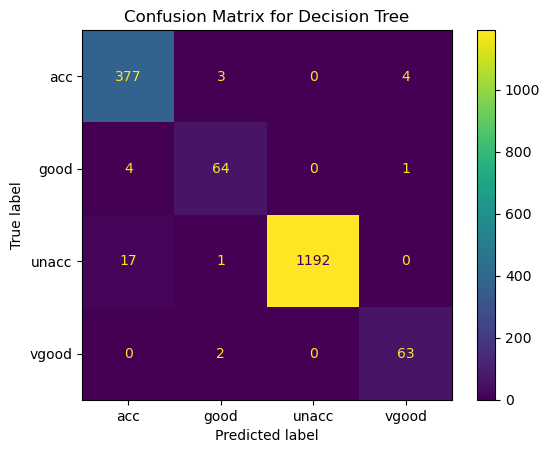

Decision Tree Performance Metrics:
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

         acc       0.95      0.98      0.96       384
        good       0.91      0.93      0.92        69
       unacc       1.00      0.99      0.99      1210
       vgood       0.93      0.97      0.95        65

    accuracy                           0.98      1728
   macro avg       0.95      0.97      0.96      1728
weighted avg       0.98      0.98      0.98      1728



C:\Users\samee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _

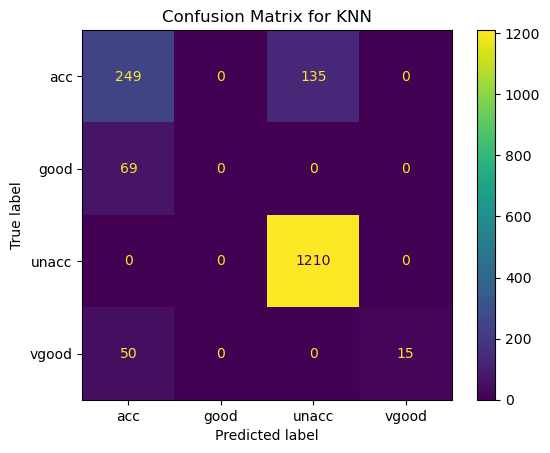

KNN Performance Metrics:
Accuracy: 0.8530
Classification Report:
              precision    recall  f1-score   support

         acc       0.68      0.65      0.66       384
        good       0.00      0.00      0.00        69
       unacc       0.90      1.00      0.95      1210
       vgood       1.00      0.23      0.38        65

    accuracy                           0.85      1728
   macro avg       0.64      0.47      0.50      1728
weighted avg       0.82      0.85      0.82      1728



C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


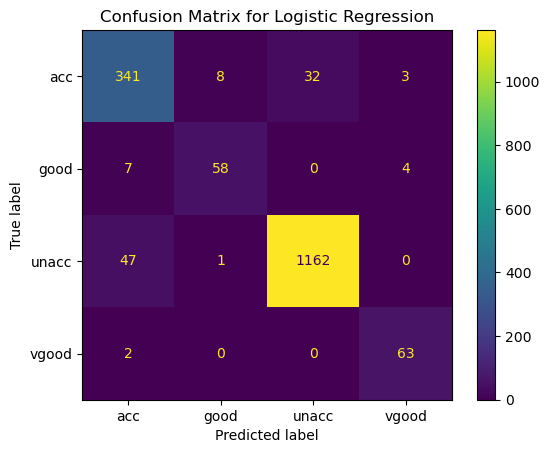

Logistic Regression Performance Metrics:
Accuracy: 0.9398
Classification Report:
              precision    recall  f1-score   support

         acc       0.86      0.89      0.87       384
        good       0.87      0.84      0.85        69
       unacc       0.97      0.96      0.97      1210
       vgood       0.90      0.97      0.93        65

    accuracy                           0.94      1728
   macro avg       0.90      0.91      0.91      1728
weighted avg       0.94      0.94      0.94      1728



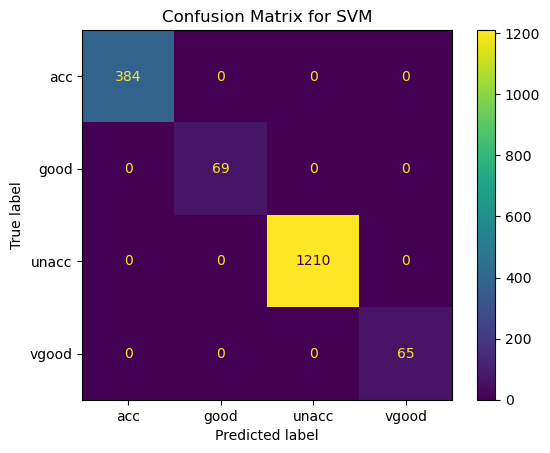

SVM Performance Metrics:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       384
        good       1.00      1.00      1.00        69
       unacc       1.00      1.00      1.00      1210
       vgood       1.00      1.00      1.00        65

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728



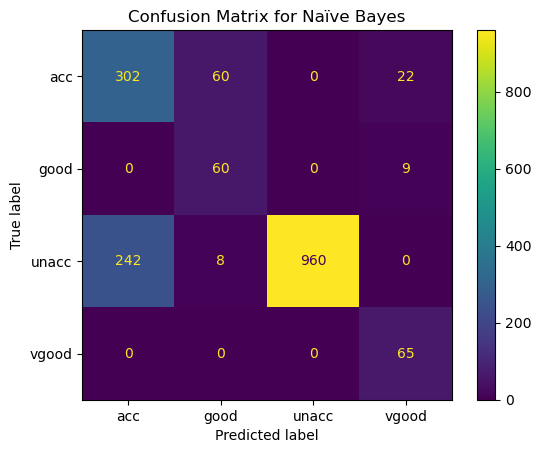

Naïve Bayes Performance Metrics:
Accuracy: 0.8027
Classification Report:
              precision    recall  f1-score   support

         acc       0.56      0.79      0.65       384
        good       0.47      0.87      0.61        69
       unacc       1.00      0.79      0.88      1210
       vgood       0.68      1.00      0.81        65

    accuracy                           0.80      1728
   macro avg       0.68      0.86      0.74      1728
weighted avg       0.87      0.80      0.82      1728

Decision Tree: Kappa = 0.9175 ± 0.0139
KNN: Kappa = 0.6705 ± 0.0678
Logistic Regression: Kappa = 0.8519 ± 0.0082
SVM: Kappa = 0.9987 ± 0.0025
Naïve Bayes: Kappa = 0.6321 ± 0.0275


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             cohen_kappa_score, f1_score, make_scorer, ConfusionMatrixDisplay)

# Load dataset
url = 'car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# Define categorical encoding (One-Hot Encoding)
categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
one_hot_encoder = OneHotEncoder()
X = one_hot_encoder.fit_transform(data[categorical_features]).toarray()
y = data['class']

# Define outer and inner cross-validation loops
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Checking class distribution
print(data['class'].value_counts(normalize=True))  

# Define evaluation metrics
kappa_scorer = make_scorer(cohen_kappa_score)
f1_scorer = make_scorer(f1_score, average='weighted')

# Define models and hyperparameter grids
models = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}),
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=500), {'C': [0.1, 1, 10]}),
    "SVM": (SVC(probability=True, random_state=42), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Naïve Bayes": (GaussianNB(), {})
}

# Store results
results = {}

# Run Nested CV for each model
for name, (model, param_grid) in models.items():
    search = GridSearchCV(model, param_grid, cv=inner_cv, scoring=kappa_scorer)
    nested_cv_scores = cross_val_score(search, X, y, cv=outer_cv)
    results[name] = (nested_cv_scores.mean(), nested_cv_scores.std())
    
    # Fit the best model from search
    search.fit(X, y)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred), display_labels=best_model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Compute additional evaluation metrics
    print(f"{name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y, y_pred)}")

# Print results in a structured format
for model, (mean_kappa, std_kappa) in results.items():
    print(f"{model}: Kappa = {mean_kappa:.4f} ± {std_kappa:.4f}")
